<font size=5>一元回归模型与多元回归模型<font><br\>
　　使用nn.Module模型实现

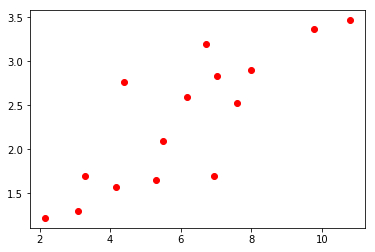

In [143]:
#一元线性回归模型
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# 画出图像
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train, y_train,'ro')

In [144]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

EPOCH[20/1000], LOSS:0.391960
EPOCH[40/1000], LOSS:0.378539
EPOCH[60/1000], LOSS:0.376096
EPOCH[80/1000], LOSS:0.373970
EPOCH[100/1000], LOSS:0.371874
EPOCH[120/1000], LOSS:0.369799
EPOCH[140/1000], LOSS:0.367746
EPOCH[160/1000], LOSS:0.365714
EPOCH[180/1000], LOSS:0.363702
EPOCH[200/1000], LOSS:0.361711
EPOCH[220/1000], LOSS:0.359740
EPOCH[240/1000], LOSS:0.357790
EPOCH[260/1000], LOSS:0.355859
EPOCH[280/1000], LOSS:0.353948
EPOCH[300/1000], LOSS:0.352057
EPOCH[320/1000], LOSS:0.350185
EPOCH[340/1000], LOSS:0.348332
EPOCH[360/1000], LOSS:0.346498
EPOCH[380/1000], LOSS:0.344683
EPOCH[400/1000], LOSS:0.342886
EPOCH[420/1000], LOSS:0.341108
EPOCH[440/1000], LOSS:0.339348
EPOCH[460/1000], LOSS:0.337606
EPOCH[480/1000], LOSS:0.335882
EPOCH[500/1000], LOSS:0.334175
EPOCH[520/1000], LOSS:0.332486
EPOCH[540/1000], LOSS:0.330814
EPOCH[560/1000], LOSS:0.329159
EPOCH[580/1000], LOSS:0.327521
EPOCH[600/1000], LOSS:0.325900
EPOCH[620/1000], LOSS:0.324295
EPOCH[640/1000], LOSS:0.322707
EPOCH[660/10

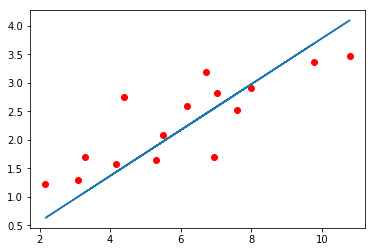

In [145]:
#定义一个简单模型　模型可以cuda()
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.liner = nn.Linear(1,1)#模型输入输出维度
    
    def forward(self,x):
        out = self.liner(x)
        return out
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()
    
#定义损失函数criterion
#优化函数optimizer 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)

#训练模型　条件使用迭代次数
num_epochs = 1000
for epoch in range(num_epochs):
    if torch.cuda.is_available():
        inputs = Variable(x_train).cuda()
        targets = Variable(y_train).cuda()
    else:
        inputs = Variable(x_train)
        targets = Variable(y_train)
    
    #forward
    out = model.forward(inputs)
    loss = criterion(out,targets)
    #backward
    optimizer.zero_grad()#优化器参数梯度归为０
    loss.backward()#损失函数回传　求出参数梯度
    optimizer.step()#优化器更新参数
    
    if(epoch+1)%20 ==0:
        print('EPOCH[{}/{}], LOSS:{:.6f}'.format(epoch+1,num_epochs,loss.data[0]))
        
#测试模型
model.eval()#将模型变成测试模式
predict = model.forward(Variable(x_train))
predict = predict.data.numpy()

plt.plot(x_train.numpy(), y_train.numpy(),'ro')
plt.plot(x_train.numpy(), predict)
plt.show()

<font siez=4>多元线性回归模型<font>

In [146]:
# 定义一个多变量函数
w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数
f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子

print(f_des)

w_target = torch.FloatTensor(w_target).unsqueeze(1)
b_target = torch.FloatTensor(b_target)


y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


In [147]:
#构造训练数据x和y
def make_feature(x):
    x=x.unsqueeze(1)#将一行tensor_x转换为一列tensor
    return torch.cat([x**i for i in range(1,4)],1)#tensor的拼接　按照列方向

In [148]:
def f(x):
    return torch.mm(x,w_target)+b_target[0]


In [149]:
#得到真实样本值
def get_batch(batch_size=30):
    random = torch.randn(batch_size)
    x = make_feature(random)
    y = f(x)
    if torch.cuda.is_available():
        return Variable(x).cuda(),Variable(y).cuda()
    else:
        return Variable(x),Variable(y)


In [150]:
#定义多元回归模型
class poly_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.poly = nn.Linear(3,1)
    def forward(self,x):
        out = self.poly(x)
        return out
if torch.cuda.is_available():
    model = poly_model().cuda()
else:
    model = poly_model()

#定义损失函数　和　优化函数
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)



In [151]:
#训练模型
epoch = 0
while True:
    batch_x,batch_y = get_batch()#每次迭代获得真实样本值
    #forward
    output = model().forward(batch_x)
    loss = criterion(output,batch_y)
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch += 1
    if loss.data[0]<1e-8:
        break
    print('{}---LOSS:{:.6f}'.format(epoch,loss.data[0]))

1---LOSS:30.440029
2---LOSS:234.430908
3---LOSS:118.740700
4---LOSS:105.404167
5---LOSS:16.736137
6---LOSS:12.260071
7---LOSS:10.136265
8---LOSS:9.259082
9---LOSS:6.183692
10---LOSS:6.504588
11---LOSS:8.689518
12---LOSS:10.578088
13---LOSS:5.743258
14---LOSS:10.444517
15---LOSS:2.864880
16---LOSS:1.175854
17---LOSS:3.988102
18---LOSS:5.386870
19---LOSS:0.906907
20---LOSS:2.328236
21---LOSS:3.145111
22---LOSS:7.808016
23---LOSS:1.375396
24---LOSS:0.872410
25---LOSS:0.691596
26---LOSS:3.053490
27---LOSS:4.001873
28---LOSS:0.937277
29---LOSS:0.345593
30---LOSS:1.249874
31---LOSS:0.405661
32---LOSS:0.247865
33---LOSS:1.049159
34---LOSS:0.566663
35---LOSS:0.107930
36---LOSS:0.358539
37---LOSS:0.232723
38---LOSS:0.299361
39---LOSS:0.053956
40---LOSS:0.077232
41---LOSS:0.190197
42---LOSS:0.053903
43---LOSS:0.113965
44---LOSS:0.036103
45---LOSS:0.035328
46---LOSS:0.040581
47---LOSS:0.041049
48---LOSS:0.041357
49---LOSS:0.022042
50---LOSS:0.028651
51---LOSS:0.023395
52---LOSS:0.085697
53---LOSS

473---LOSS:0.000039
474---LOSS:0.000030
475---LOSS:0.000021
476---LOSS:0.000025
477---LOSS:0.000052
478---LOSS:0.000025
479---LOSS:0.000032
480---LOSS:0.000021
481---LOSS:0.000018
482---LOSS:0.000022
483---LOSS:0.000018
484---LOSS:0.000018
485---LOSS:0.000014
486---LOSS:0.000020
487---LOSS:0.000067
488---LOSS:0.000029
489---LOSS:0.000018
490---LOSS:0.000023
491---LOSS:0.000046
492---LOSS:0.000025
493---LOSS:0.000023
494---LOSS:0.000023
495---LOSS:0.000034
496---LOSS:0.000017
497---LOSS:0.000026
498---LOSS:0.000028
499---LOSS:0.000020
500---LOSS:0.000016
501---LOSS:0.000070
502---LOSS:0.000033
503---LOSS:0.000025
504---LOSS:0.000032
505---LOSS:0.000015
506---LOSS:0.000019
507---LOSS:0.000020
508---LOSS:0.000017
509---LOSS:0.000021
510---LOSS:0.000015
511---LOSS:0.000020
512---LOSS:0.000016
513---LOSS:0.000011
514---LOSS:0.000013
515---LOSS:0.000014
516---LOSS:0.000023
517---LOSS:0.000016
518---LOSS:0.000011
519---LOSS:0.000011
520---LOSS:0.000012
521---LOSS:0.000011
522---LOSS:0.000010


904---LOSS:0.000000
905---LOSS:0.000000
906---LOSS:0.000000
907---LOSS:0.000000
908---LOSS:0.000000
909---LOSS:0.000000
910---LOSS:0.000000
911---LOSS:0.000000
912---LOSS:0.000000
913---LOSS:0.000000
914---LOSS:0.000000
915---LOSS:0.000000
916---LOSS:0.000000
917---LOSS:0.000000
918---LOSS:0.000000
919---LOSS:0.000000
920---LOSS:0.000000
921---LOSS:0.000000
922---LOSS:0.000000
923---LOSS:0.000000
924---LOSS:0.000000
925---LOSS:0.000000
926---LOSS:0.000000
927---LOSS:0.000000
928---LOSS:0.000000
929---LOSS:0.000000
930---LOSS:0.000000
931---LOSS:0.000000
932---LOSS:0.000000
933---LOSS:0.000000
934---LOSS:0.000000
935---LOSS:0.000000
936---LOSS:0.000000
937---LOSS:0.000000
938---LOSS:0.000000
939---LOSS:0.000000
940---LOSS:0.000000
941---LOSS:0.000000
942---LOSS:0.000000
943---LOSS:0.000000
944---LOSS:0.000000
945---LOSS:0.000000
946---LOSS:0.000000
947---LOSS:0.000000
948---LOSS:0.000000
949---LOSS:0.000000
950---LOSS:0.000000
951---LOSS:0.000000
952---LOSS:0.000000
953---LOSS:0.000000


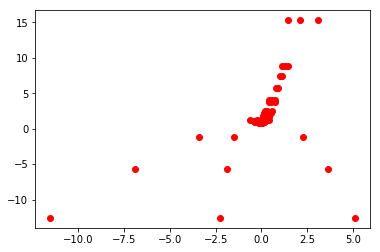

In [159]:
#测试模型
model.eval()#将模型变成测试模式
predict = model.forward(batch_x)
plt.plot(batch_x.data.numpy(), batch_y.data.numpy(),'ro')
plt.show()

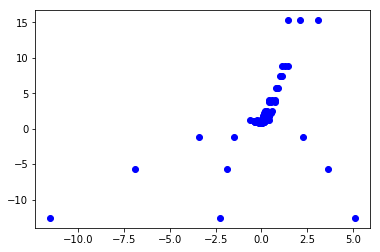

In [160]:
plt.plot(batch_x.data.numpy(), predict.data.numpy(),'bo')
plt.show()